In [1]:
import openbabel
from openbabel import pybel
# バージョンが変わって、import pybelではなくfrom openbabel import pybelで読み込むように変わっています。

In [2]:
# 読み込みフォーマットと出力のフォーマットの数
print(len(pybel.informats), len(pybel.outformats))

147 134


In [3]:
pybel.informats

{'abinit': 'ABINIT Output Format',
 'acesout': 'ACES output format',
 'acr': 'ACR format',
 'adfband': 'ADF Band output format',
 'adfdftb': 'ADF DFTB output format',
 'adfout': 'ADF output format',
 'alc': 'Alchemy format',
 'aoforce': 'Turbomole AOFORCE output format',
 'arc': 'Accelrys/MSI Biosym/Insight II CAR format',
 'axsf': 'XCrySDen Structure Format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c09out': 'Crystal 09 output format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'caccrt': 'Cacao Cartesian format',
 'can': 'Canonical SMILES format',
 'car': 'Accelrys/MSI Biosym/Insight II CAR format',
 'castep': 'CASTEP format',
 'ccc': 'CCC format',
 'cdjson': 'ChemDoodle JSON',
 'cdx': 'ChemDraw binary format',
 'cdxml': 'ChemDraw CDXML format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'cof': 'Culgi object

In [4]:
pybel.outformats

{'acesin': 'ACES input format',
 'adf': 'ADF cartesian input format',
 'alc': 'Alchemy format',
 'ascii': 'ASCII format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'cac': 'CAChe MolStruct format',
 'caccrt': 'Cacao Cartesian format',
 'cache': 'CAChe MolStruct format',
 'cacint': 'Cacao Internal format',
 'can': 'Canonical SMILES format',
 'cdjson': 'ChemDoodle JSON',
 'cdxml': 'ChemDraw CDXML format',
 'cht': 'Chemtool format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'cof': 'Culgi object file format',
 'com': 'Gaussian Input',
 'confabreport': 'Confab report format',
 'CONFIG': 'DL-POLY CONFIG',
 'CONTCAR': 'VASP format',
 'CONTFF': 'MDFF format',
 'copy': 'Copy raw text',
 'crk2d': 'Chemical Resource Kit diagram(2D)',
 'crk3d': 'Chemical Resource Kit 3D format',
 '

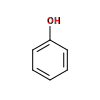

In [5]:
# smilesでの分子の読み込み
m = pybel.readstring("smiles", "C1=CC=C(C=C1)O")
m

In [6]:
# xyz座標での分子の出力
print(m.write("xyz"))

7

C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
O          0.00000        0.00000        0.00000



In [7]:
#openbabelを用いた構造最適化
m.make3D(forcefield='mmff94', steps=1000)
print(m.write("xyz"))

13

C         -1.87568        0.03410       -0.00509
C         -1.19721       -1.18589       -0.00406
C          0.19853       -1.21088        0.00191
C          0.90327       -0.01035        0.00679
C          0.23498        1.20891        0.00620
C         -1.15951        1.23167        0.00014
O          2.26679        0.01257        0.01209
H         -2.96253        0.05194       -0.00994
H         -1.75770       -2.11714       -0.00797
H          0.71278       -2.16634        0.00273
H          0.79829        2.13748        0.01024
H         -1.68618        2.18214       -0.00059
H          2.58978       -0.90307        0.00846



In [8]:
mopac_format = m.write("mop")
print(mopac_format)

PUT KEYWORDS HERE


C  -1.87568 1  0.03410 1 -0.00509 1
C  -1.19721 1 -1.18589 1 -0.00406 1
C   0.19853 1 -1.21088 1  0.00191 1
C   0.90327 1 -0.01035 1  0.00679 1
C   0.23498 1  1.20891 1  0.00620 1
C  -1.15951 1  1.23167 1  0.00014 1
O   2.26679 1  0.01257 1  0.01209 1
H  -2.96253 1  0.05194 1 -0.00994 1
H  -1.75770 1 -2.11714 1 -0.00797 1
H   0.71278 1 -2.16634 1  0.00273 1
H   0.79829 1  2.13748 1  0.01024 1
H  -1.68618 1  2.18214 1 -0.00059 1
H   2.58978 1 -0.90307 1  0.00846 1



In [9]:
# 初めの3行を削除した。
mopac_cartesian = mopac_format.replace('PUT KEYWORDS HERE\n\n\n', '')

In [10]:
#新しい3行を追加する。
mopac_keyword = "PM7 EF\n" #ここにキーワードを書く
memo1 = m.write("smiles") #任意の文字_メモ書き 。今回は分子のsmilesを書き込んだ。
memo2 = m.write("inchi") #任意の文字_メモ書き。今回は分子のinchiを書き込んだ。

mopac_code = mopac_keyword + memo1 + memo2 + mopac_cartesian
print(mopac_code)

PM7 EF
c1ccc(cc1)O	
InChI=1S/C6H6O/c7-6-4-2-1-3-5-6/h1-5,7H
C  -1.87568 1  0.03410 1 -0.00509 1
C  -1.19721 1 -1.18589 1 -0.00406 1
C   0.19853 1 -1.21088 1  0.00191 1
C   0.90327 1 -0.01035 1  0.00679 1
C   0.23498 1  1.20891 1  0.00620 1
C  -1.15951 1  1.23167 1  0.00014 1
O   2.26679 1  0.01257 1  0.01209 1
H  -2.96253 1  0.05194 1 -0.00994 1
H  -1.75770 1 -2.11714 1 -0.00797 1
H   0.71278 1 -2.16634 1  0.00273 1
H   0.79829 1  2.13748 1  0.01024 1
H  -1.68618 1  2.18214 1 -0.00059 1
H   2.58978 1 -0.90307 1  0.00846 1



In [11]:
# ファイルへの書き込み
with open("phenol.dat", mode='w') as f:
    f.write(mopac_code)

# 以下は、入力ファイルの形式などについてです。

入力ファイルの構成について
入力ファイルは、最初の行に使用するハミルトニアン(AM1, PM3など)と計算に必要なキーワードを指定。
2行目と3行目はスペースです(個人的なメモを記入してもOKです)。
4行目から、分子座標を入力します。分子座標の最後に空白行を加えれば、入力ファイルの完成です。
テキストエディッタで作成する場合は、拡張子を.datにすればOKです。

【 計算目的 】
ハミルトニアンと組み合わせて計算目的を指定します。例えば、「PM3 EF」と記述すれば「PM3法で構造最適化計算」を実行します。常用するのは、以下の5つです。

1) EF： 構造最適化
2) FORCE： 振動解析
3) TS： 遷移状態探索
4) SADDLE： 与えられた2つの構造から遷移状態の候補構造を計算する
5) IRC：極限反応座標計算 (IRC=1, IRC=-1)

【 オプション 】
上記のハミルトニアンと計算目的に対して、さらに追加情報を記述します。例えば「PM3 EF PRECISE GEO-OK」であれば「PM3法の構造最適化で収束判定を100倍厳しくし、なおかつ原子が異常接近を無視して計算」という命令を実行します。常用するのは、以下の5つです。

1) PRECISE：収束判定を100倍厳しくする
2) GEO-OK：原子が異常に接近した場合のチェックを無視する
3) LARGE=n：IRC計算と組み合わせてIRC距離毎の計算回数を指定
※ex. PM3 IRC=1 LARGE=50 (この場合、IRC距離50回おきに計算と指定しています)
4) RECALC=n： 最適化サイクルごとに二次微分を計算させる (系のポテンシャル曲面が浅い場合等に使用します)